<a href="https://colab.research.google.com/github/vihaankrishna100/AI-Neural-Networks/blob/main/PredictingUsedCarSales.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
print(tf.__version__)
import seaborn as sns
import pandas as pd
import numpy as np
from tensorflow.keras.layers import Dense, Dropout, Activation, Input
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.optimizers import Adam

2.18.0


## **Preprocessing Data**

In [ ]:
df = pd.read_csv("/content/car_data.csv")
df.head()

,Unnamed: 0,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
0,0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,NaN,1.75
1,1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,NaN,12.50
2,2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,8.61 Lakh,4.50
3,3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,NaN,6.00
4,4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,NaN,17.74


In [ ]:
df = df.drop(columns=['Unnamed: 0', 'New_Price', 'Name'])

In [ ]:
df.head()

,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
0,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,1.75
1,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,12.50
2,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,4.50
3,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,6.00
4,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,17.74


<Axes: xlabel='Price', ylabel='Count'>

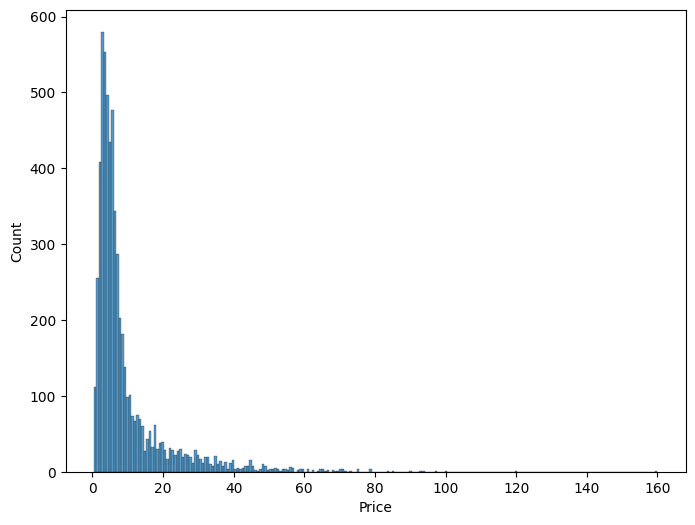

In [ ]:
sns.histplot(data=df, x='Price')

<Axes: >

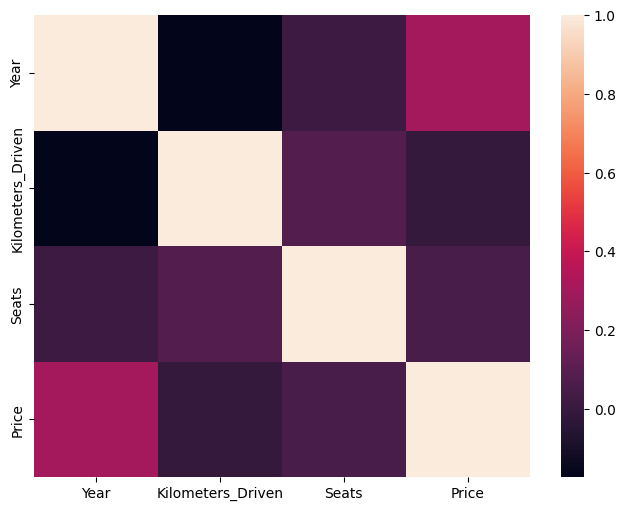

In [ ]:
df.describe()

import matplotlib.pyplot as plt

%matplotlib inline
plt.rcParams["figure.figsize"] = [8,6]
corr = df.corr(numeric_only=True)
corr

sns.heatmap(corr)

In [ ]:
numerical = df.drop(['Location', 'Fuel_Type', 'Transmission', 'Owner_Type', 'Engine', 'Mileage', 'Power'], axis = 1)
categorical = df.filter(['Location', 'Fuel_Type', 'Transmission', 'Owner_Type', 'Engine', 'Mileage', 'Power'])
categorical.head()

,Location,Fuel_Type,Transmission,Owner_Type,Engine,Mileage,Power
0,Mumbai,CNG,Manual,First,998 CC,26.6 km/kg,58.16 bhp
1,Pune,Diesel,Manual,First,1582 CC,19.67 kmpl,126.2 bhp
2,Chennai,Petrol,Manual,First,1199 CC,18.2 kmpl,88.7 bhp
3,Chennai,Diesel,Manual,First,1248 CC,20.77 kmpl,88.76 bhp
4,Coimbatore,Diesel,Automatic,Second,1968 CC,15.2 kmpl,140.8 bhp


In [ ]:
cat_numerical = pd.get_dummies(categorical,drop_first=True, dtype=int)
cat_numerical.head()

,Location_Bangalore,Location_Chennai,Location_Coimbatore,Location_Delhi,Location_Hyderabad,Location_Jaipur,Location_Kochi,Location_Kolkata,Location_Mumbai,Location_Pune,...,Power_97.6 bhp,Power_97.7 bhp,Power_98.59 bhp,Power_98.6 bhp,Power_98.79 bhp,Power_98.82 bhp,Power_98.96 bhp,Power_99 bhp,Power_99.6 bhp,Power_null bhp
0,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
df = pd.concat([numerical, cat_numerical], axis = 1)
df.head()

,Year,Kilometers_Driven,Seats,Price,Location_Bangalore,Location_Chennai,Location_Coimbatore,Location_Delhi,Location_Hyderabad,Location_Jaipur,...,Power_97.6 bhp,Power_97.7 bhp,Power_98.59 bhp,Power_98.6 bhp,Power_98.79 bhp,Power_98.82 bhp,Power_98.96 bhp,Power_99 bhp,Power_99.6 bhp,Power_null bhp
0,2010,72000,5.0,1.75,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2015,41000,5.0,12.50,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2011,46000,5.0,4.50,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,2012,87000,7.0,6.00,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,2013,40670,5.0,17.74,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
df.dropna(inplace = True)

In [ ]:
X = df.drop(['Price'], axis=1)
y = df["Price"]

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.20, random_state=42)

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

## **Model Creation**

In [ ]:
def create_model(learning_rate, dropout_rate):


    input_layer = Input(shape=(X_train.shape[1],))

    dense_layer0 = Dense(100, activation='relu')(input_layer)
    dense_layer1 = Dense(50, activation='relu')(dense_layer0)
    dense_layer2 = Dense(25, activation='relu')(dense_layer1)


    dense_layer3 = Dense(10, activation='relu')(dense_layer2)
    dense_layer4 = Dense(5, activation='relu')(dense_layer3)
    dense_layer5 = Dense(2, activation='relu')(dense_layer4)

    output = Dense(1)(dense_layer5)

    model = Model(inputs=input_layer, outputs=output)

    adam = Adam(learning_rate)
    model.compile(loss="mean_absolute_error", optimizer="adam", metrics=['mean_absolute_error'])

    return model

In [ ]:
dropout_rate = 0.1
epochs = 5
batch_size = 5
learn_rate = 0.001

model = create_model(learn_rate, dropout_rate)

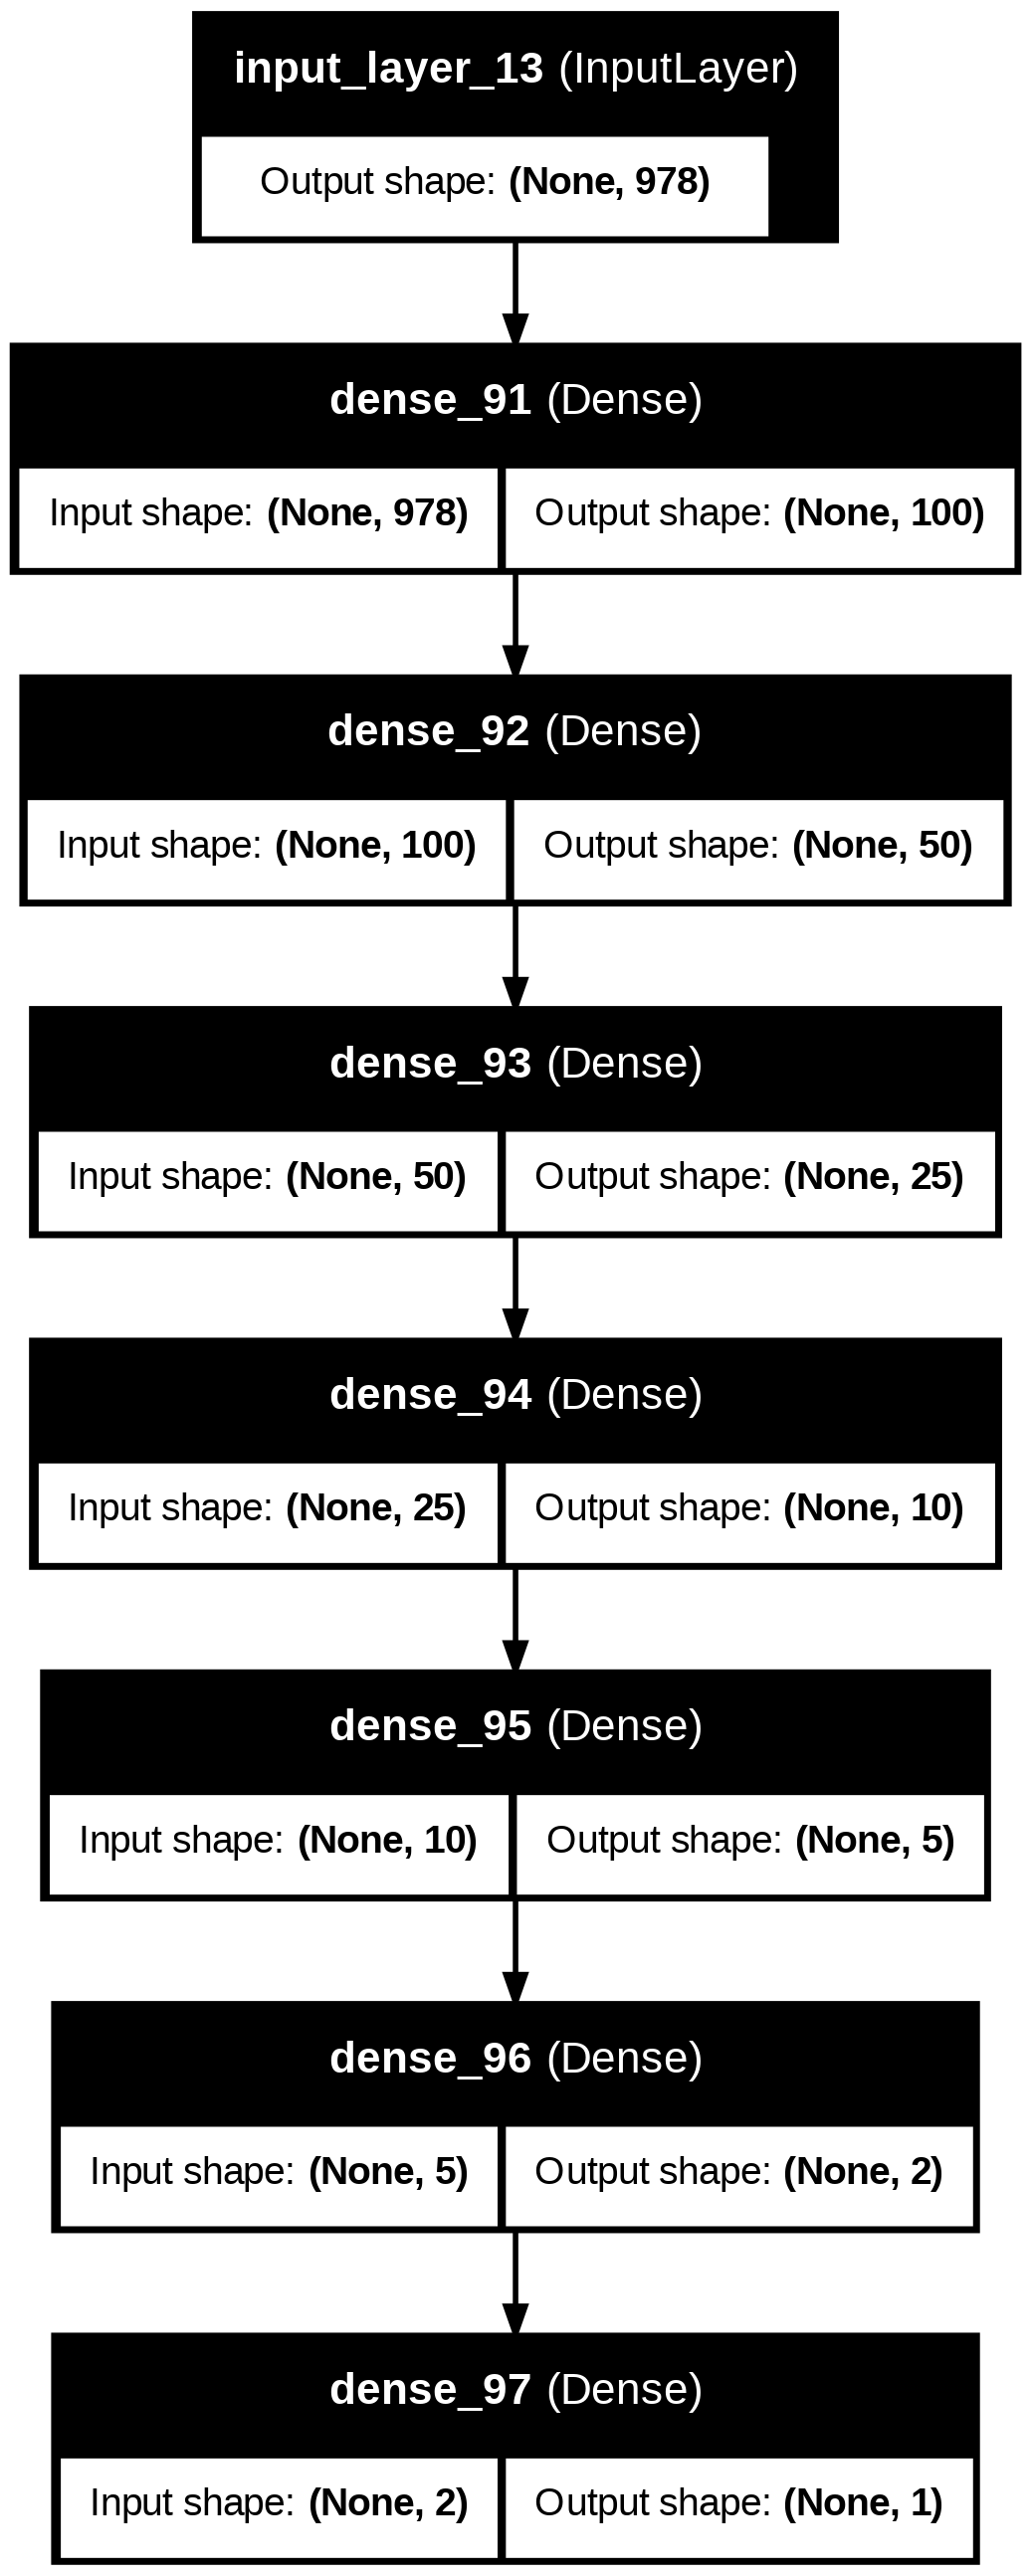

In [ ]:
from tensorflow.keras.utils import plot_model

plot_model(model, to_file='model_plot1.png', show_shapes=True, show_layer_names=True)

In [ ]:
model_history = model.fit(X_train, y_train, batch_size=batch_size, epochs=epochs, validation_split=0.2, verbose=1)

Epoch 1/5
765/765 ━━━━━━━━━━━━━━━━━━━━ 8s 6ms/step - loss: 4.8016 - mean_absolute_error: 4.8016 - val_loss: 2.5716 - val_mean_absolute_error: 2.5716
Epoch 2/5
765/765 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - loss: 2.1112 - mean_absolute_error: 2.1112 - val_loss: 2.2853 - val_mean_absolute_error: 2.2853
Epoch 3/5
765/765 ━━━━━━━━━━━━━━━━━━━━ 6s 6ms/step - loss: 1.7832 - mean_absolute_error: 1.7832 - val_loss: 2.1015 - val_mean_absolute_error: 2.1015
Epoch 4/5
765/765 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - loss: 1.6480 - mean_absolute_error: 1.6480 - val_loss: 2.0210 - val_mean_absolute_error: 2.0210
Epoch 5/5
765/765 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - loss: 1.4586 - mean_absolute_error: 1.4586 - val_loss: 2.0891 - val_mean_absolute_error: 2.0891


## **Model Accuracy Testing**





In [ ]:
accuracies = model.evaluate(X_test, y_test, verbose=1)

print("Test Score: ", accuracies[0])
print("Test Accuracy: ", accuracies[1])

38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 2.1209 - mean_absolute_error: 2.1209
Test Score:  2.2032461166381836
Test Accuracy:  2.2032461166381836


dict_keys(['loss', 'mean_absolute_error', 'val_loss', 'val_mean_absolute_error'])


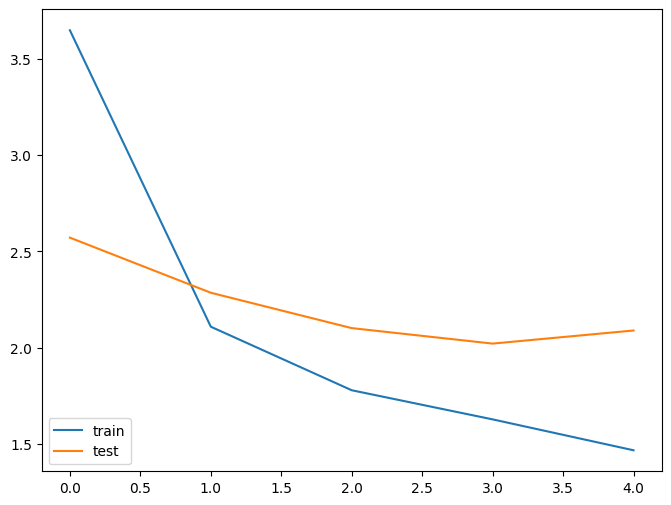

In [ ]:
history_dict = model_history.history
print(history_dict.keys())
import matplotlib.pyplot as plt

plt.plot(model_history.history['mean_absolute_error'], label = 'mean_absolute_error')
plt.plot(model_history.history['val_mean_absolute_error'], label = 'val_mean_absolute_error')

plt.legend(['train','test'], loc='lower left')

In [ ]:
y_pred = model.predict(X_test)
comparison_df = pd.DataFrame({'Actual': y_test.values.tolist(), 'Predicted': y_pred.tolist()})
comparison_df

38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step


,Actual,Predicted
0,4.70,[3.6047797203063965]
1,4.65,[4.7223076820373535]
2,6.16,[6.708902359008789]
3,24.68,[22.569740295410156]
4,23.50,[22.084251403808594]
...,...,...
1191,1.45,[1.1233094930648804]
1192,2.45,[1.916454553604126]
1193,3.50,[4.87004280090332]
1194,1.65,[1.466360092163086]


In [ ]:
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))


Mean Absolute Error: 2.2032460472515996
Mean Squared Error: 25.97197349911878
Root Mean Squared Error: 5.096270548069321


## **Finding a Single Value and Comparing Model**

In [ ]:
single_point = X_test[1].reshape(1,-1)
single_point.shape

model.predict(X_test[1].reshape(1,-1))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step


array([[4.722308]], dtype=float32)

In [ ]:
y_test.values[1]

4.65

End of Predicting Car Sales using a Feed Forward Neural Network(Dense Neural Network).